# Projekt: Rozpoznanie Liter

## Autor: Duy Vu Thanh, Oskar Paciorkowski

### 1. Źródło Danych
Dane użyte w projekcie pochodzą z [bazy danych UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/letter+recognition). Zbiór danych zawiera litery alfabetu angielskiego napisane w dwudziestu różnych czcionkach. Litery są reprezentowane jako mapy pikseli czarno-białych, z losowymi deformacjami. Po przekształceniu, litery są opisane za pomocą 16 atrybutów numerycznych o wartościach od 0 do 15. Zbiór danych zawiera 20 000 przykładów.

### 2. Opis Zadania
Celem badania jest stworzenie klasyfikatora zdolnego do rozpoznawania liter na podstawie dostarczonych danych. Zbiór treningowy składa się z 16 000 pierwszych liter, a zbiór testowy z 4 000 pozostałych liter.

### 3. Metoda i Implementacja
a) **Normalizacja Atrybutów:** Wartości atrybutów zostaną znormalizowane, aby doprowadzić je do zakresu (0,1).

b) **Wybór Klasyfikatorów:**
   - k-NN (k-najbliższych sąsiadów)
   - Sieć Neuronowa

c) **Testowanie Skuteczności:**
   - Skuteczność każdego z wybranych klasyfikatorów będzie testowana, a ich trafności w klasyfikacji liter będą porównywane.

### 4. Model Testowania
   - **Zbiór Treningowy:** Pierwsze 16 000 liter (wierszy) w pliku 'letter-recognition.data'.
   - **Zbiór Testowy:** Pozostałe 4 000 liter w tym samym pliku.

### 5. Miara Oceny
Miara oceny skuteczności klasyfikacji będzie oparta na trafności (accuracy) klasyfikatora na zbiorze testowym. 

Projekt ma na celu opracowanie efektywnego systemu rozpoznawania liter z wykorzystaniem różnych klasyfikatorów i ocenę ich skuteczności w kontekście klasyfikacji liter alfabetu angielskiego.


In [21]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [22]:
column_names = ['class'] + [f"attr{n}" for n in range(1, 17)]
data_set = pd.read_csv('data_sets/letter-recognition.data', header=None, names=column_names)

upper_limit = data_set.shape[1]

#column_names = ['class'] + [f"attr{n}" for n in range(1, 17)]

print(data_set.shape)
data_set.head(10)

(20000, 17)


,class,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [23]:
#normalizacja danych
class_column = data_set['class']
attributes = data_set.drop(columns=['class'])

scaler = MinMaxScaler()
normalized_attributes = pd.DataFrame(scaler.fit_transform(attributes), columns=attributes.columns)

normalized_df = pd.concat([class_column, normalized_attributes], axis=1)

print(normalized_df.head(10))

  class     attr1     attr2     attr3     attr4     attr5     attr6     attr7  \
0     T  0.133333  0.533333  0.200000  0.333333  0.066667  0.533333  0.866667   
1     I  0.333333  0.800000  0.200000  0.466667  0.133333  0.666667  0.333333   
2     D  0.266667  0.733333  0.400000  0.533333  0.400000  0.666667  0.400000   
3     N  0.466667  0.733333  0.400000  0.400000  0.200000  0.333333  0.600000   
4     G  0.133333  0.066667  0.200000  0.066667  0.066667  0.533333  0.400000   
5     S  0.266667  0.733333  0.333333  0.533333  0.200000  0.533333  0.533333   
6     B  0.266667  0.133333  0.333333  0.266667  0.266667  0.533333  0.466667   
7     A  0.066667  0.066667  0.200000  0.133333  0.066667  0.533333  0.133333   
8     J  0.133333  0.133333  0.266667  0.266667  0.133333  0.666667  0.400000   
9     M  0.733333  1.000000  0.866667  0.600000  0.466667  0.866667  0.133333   

      attr8     attr9    attr10    attr11    attr12    attr13    attr14  \
0  0.000000  0.400000  0.400000  

In [24]:
class_freq = (data_set.groupby('class').size())
print (type(class_freq))
print(class_freq)

<class 'pandas.core.series.Series'>
class
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
dtype: int64


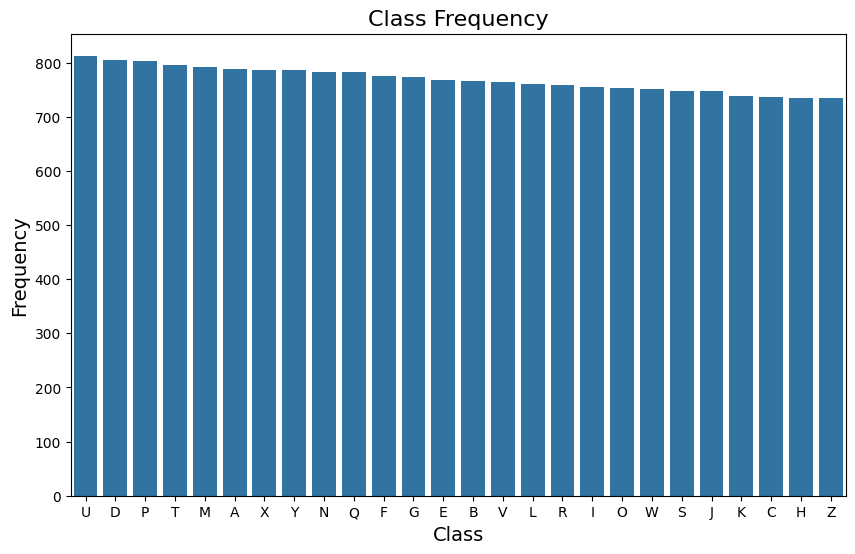

In [25]:
# Wykres dla częstości występowania klas
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=data_set, order=data_set['class'].value_counts().index)
plt.title('Class Frequency', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

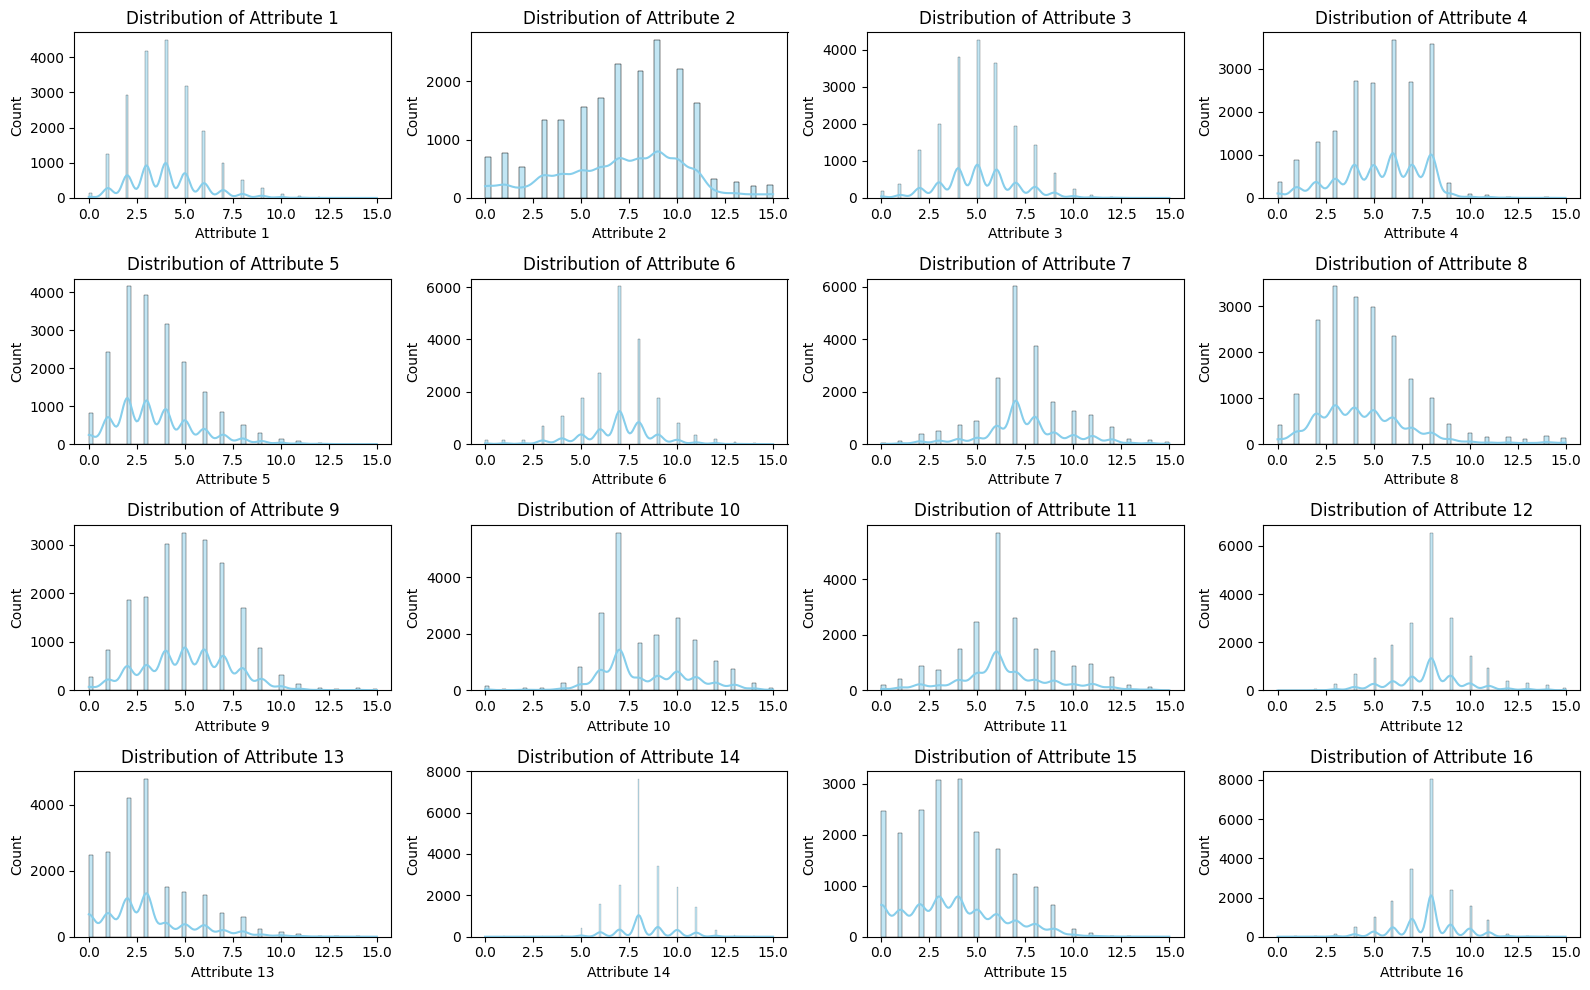

In [26]:
# Rozkłady wartości atrybutów
plt.figure(figsize=(16, 10))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    sns.histplot(data_set[f"attr{i}"], kde=True, color='skyblue')
    plt.title(f'Distribution of Attribute {i}', fontsize=12)
    plt.xlabel(f'Attribute {i}', fontsize=10)
    plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

In [27]:
# Podzielenie na zbiory treningowe i testowe
train, test = train_test_split(normalized_df, test_size=0.2, random_state=50, shuffle=True)

# Tworzenie atrybutow docelowych.

X_train = train.iloc[:, 1:] 
y_train = train.iloc[:, 0] 
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0] 

print(X_train.shape)
print(X_test.shape)

(16000, 16)
(4000, 16)


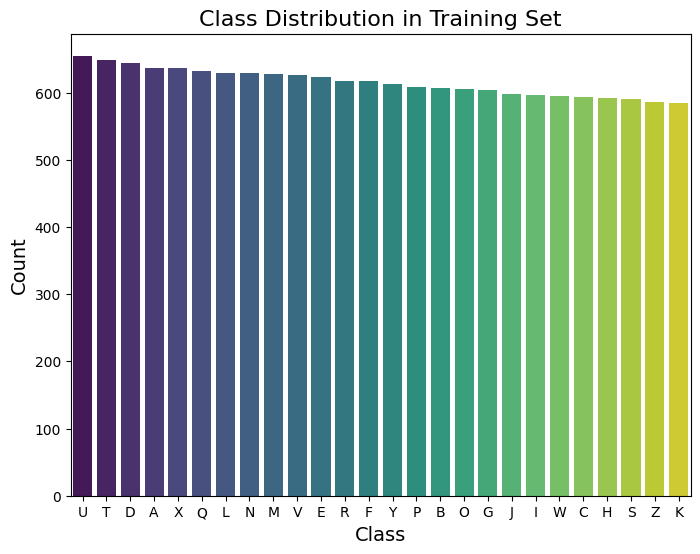

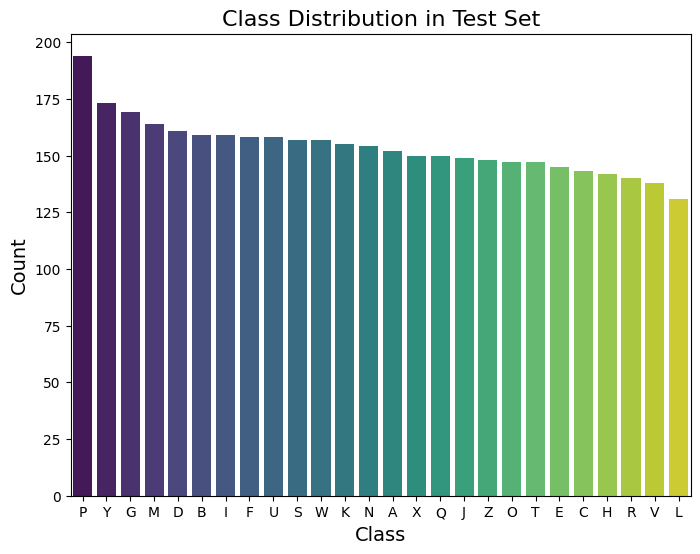

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=train, order=train['class'].value_counts().index, palette='viridis')
plt.title('Class Distribution in Training Set', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=test, order=test['class'].value_counts().index, palette='viridis')
plt.title('Class Distribution in Test Set', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

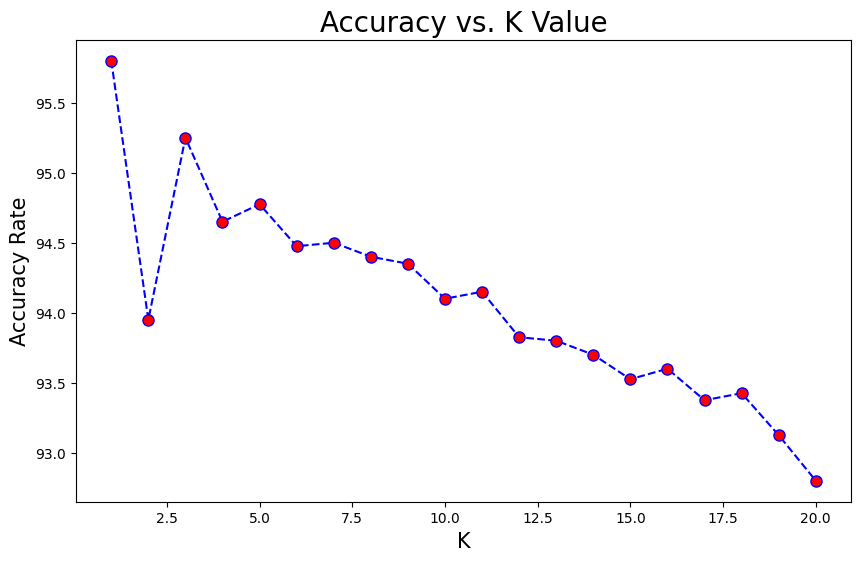

In [29]:
#KNN
acc_rate = []
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc_rate.append(accuracy_score(y_test, pred_i) * 100)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), acc_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Accuracy vs. K Value', fontsize=20)
plt.xlabel('K', fontsize=15)
plt.ylabel('Accuracy Rate', fontsize=15)
plt.show()

In [34]:
#wizualizacja KNN

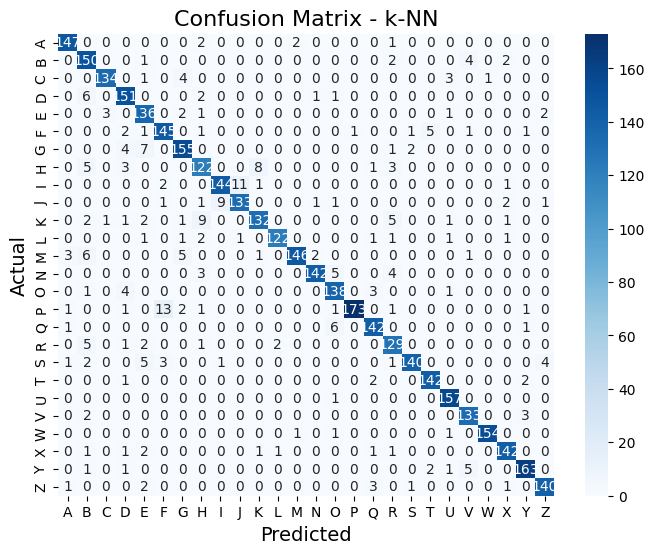

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for k-NN
knn_conf_matrix = confusion_matrix(y_test, pred_i)
plt.figure(figsize=(8, 6))

# Convert to pandas Series to use unique()
y_test_series = pd.Series(y_test)
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test_series.unique()), yticklabels=sorted(y_test_series.unique()))
plt.title('Confusion Matrix - k-NN', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()


In [11]:
#Neural Network
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)



mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, y_train)
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy - Neural Network: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy - Neural Network: 0.96


In [15]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, y_train)

print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 150, 'solver': 'adam'}


C:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
grid_predictions = grid.predict(testX_scaled) 

print('Accuracy - Neural Network with GridSearchCV: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

NameError: name 'grid' is not defined

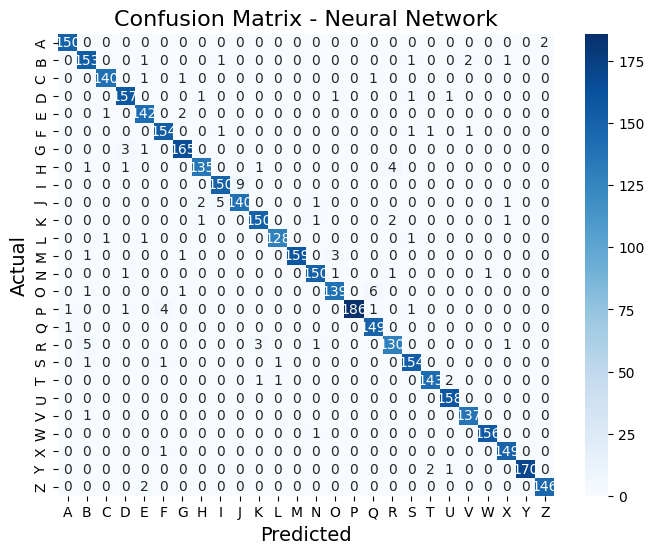

In [20]:
# Confusion matrix for Neural Network
nn_conf_matrix = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(8, 6))
y_test_series = pd.Series(y_test)
sns.heatmap(nn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test_series.unique()), yticklabels=sorted(y_test_series.unique()))
plt.title('Confusion Matrix - Neural Network', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

In [13]:
# Krzywe ROC dla sieci neuronowej
fpr, tpr, _ = roc_curve(y_test, grid_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.show()

NameError: name 'grid_predictions' is not defined

In [ ]:
# Krzywe uczenia dla sieci neuronowej
train_sizes, train_scores, test_scores = learning_curve(
    grid.best_estimator_, trainX_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve - Neural Network')
plt.legend(loc='best')
plt.show()

In [ ]:
# Histogramy prawdopodobieństw dla sieci neuronowej
plt.figure(figsize=(8, 6))
plt.hist(grid_predictions_probs[:, 0], bins=50, alpha=0.5, label='Class 0')
plt.hist(grid_predictions_probs[:, 1], bins=50, alpha=0.5, label='Class 1')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Probability Histograms - Neural Network')
plt.legend(loc='best')
plt.show()

In [25]:
# Bayes Classifier (Gaussian Naive Bayes)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_bayes = gnb.predict(X_test)

# Evaluate Bayes Classifier
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print('Accuracy - Naive Bayes: {:.2f}'.format(accuracy_bayes))

Accuracy - Naive Bayes: 0.63


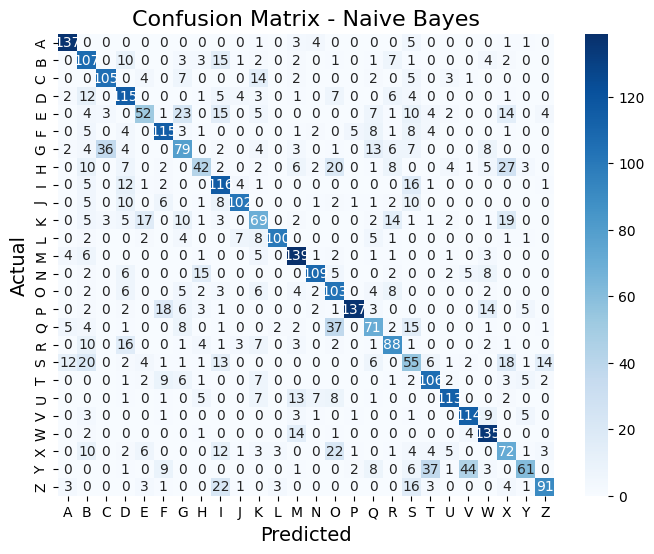

In [26]:
# Confusion matrix for Naive Bayes
bayes_conf_matrix = confusion_matrix(y_test, y_pred_bayes)
plt.figure(figsize=(8, 6))
sns.heatmap(bayes_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test_series.unique()), yticklabels=sorted(y_test_series.unique()))
plt.title('Confusion Matrix - Naive Bayes', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

In [23]:

# Classification report for k-NN
print("Classification Report - k-NN")
print(classification_report(y_test, pred_i))


Classification Report - k-NN
              precision    recall  f1-score   support

           A       0.95      0.97      0.96       152
           B       0.83      0.94      0.88       159
           C       0.97      0.94      0.95       143
           D       0.89      0.94      0.91       161
           E       0.85      0.94      0.89       145
           F       0.88      0.92      0.90       158
           G       0.91      0.92      0.91       169
           H       0.84      0.86      0.85       142
           I       0.94      0.91      0.92       159
           J       0.92      0.89      0.90       149
           K       0.92      0.85      0.89       155
           L       0.98      0.93      0.95       131
           M       0.98      0.89      0.93       164
           N       0.97      0.92      0.95       154
           O       0.90      0.94      0.92       147
           P       0.99      0.89      0.94       194
           Q       0.93      0.95      0.94       15

In [24]:
# Classification report for Neural Network
print("Classification Report - Neural Network")
print(classification_report(y_test, grid_predictions))

Classification Report - Neural Network
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       152
           B       0.94      0.96      0.95       159
           C       0.99      0.98      0.98       143
           D       0.96      0.98      0.97       161
           E       0.96      0.98      0.97       145
           F       0.96      0.97      0.97       158
           G       0.97      0.98      0.97       169
           H       0.97      0.95      0.96       142
           I       0.96      0.94      0.95       159
           J       0.94      0.94      0.94       149
           K       0.97      0.97      0.97       155
           L       0.98      0.98      0.98       131
           M       1.00      0.97      0.98       164
           N       0.97      0.97      0.97       154
           O       0.97      0.95      0.96       147
           P       1.00      0.96      0.98       194
           Q       0.95      0.99      0.9

In [28]:
# Classification report for Naive Bayes
print("Classification Report - Naive Bayes")
print(classification_report(y_test, y_pred_bayes))

Classification Report - Naive Bayes
              precision    recall  f1-score   support

           A       0.83      0.90      0.86       152
           B       0.49      0.67      0.56       159
           C       0.71      0.73      0.72       143
           D       0.56      0.71      0.63       161
           E       0.57      0.36      0.44       145
           F       0.69      0.73      0.71       158
           G       0.51      0.47      0.49       169
           H       0.51      0.30      0.38       142
           I       0.53      0.73      0.61       159
           J       0.83      0.68      0.75       149
           K       0.48      0.45      0.46       155
           L       0.93      0.76      0.84       131
           M       0.70      0.85      0.77       164
           N       0.83      0.71      0.76       154
           O       0.49      0.70      0.57       147
           P       0.93      0.71      0.80       194
           Q       0.53      0.47      0.50  

In [ ]:
#lepiej nie odpalic gridSearch poniewaz zajmuje to z 15 min.